# K-Nearest Neighbors on Classified Data

* Project: K-Nearest Neighbors on Classified Data
* Project Scope: Analyze,Visualize and apply K-NN model on classifed Dataset
* Data source: Classified Data.csv
* This data is classified, we dont know about the columns and values that it represent 

## Import libraries & Load data

In [3]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('Classified Data.csv', index_col = 0)
# taking out index column as it is in our file

## Lets  analyze and visualize data 

In [4]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


* We can see there are 11 Columns and its datatypes:
* Out of 11 columns, 10 are input variables/features (X), 1 output /target variable- 'TARGET CLASS' (y) 
* There are 1000 rows/training examples (m)

In [5]:
# lets check the data
dataset.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Here are the details of each column - 
PassengerId      Passenger Id
Survived         Survived 1 or 0
Pclass           Passenger class
Name             Name of the Passenger
Sex              Gender of the Passenger
Age              Age of the Passenger
SibSp            Sibilings / sposes on board
Parch            Parents or children on board
Ticket           Ticket number
Fare             Ticket Fare
Cabin            Cabin number
Embarked         Port Passenter boarded

In [6]:
# Checking for null columns
dataset.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

We dont have null values

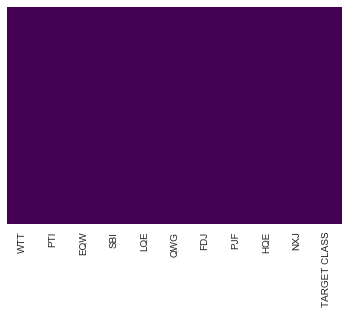

In [7]:
# Lets Visualize null data
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [8]:
dataset.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


This gives descriptive statistics that sumarize the central tendency of numerical columns. Since this is classifed data, we can't figure much from above. Also we dont have any categorical features.

# Implementing the model

In [12]:
X = dataset.drop('TARGET CLASS', axis =1)
y = dataset['TARGET CLASS']

## Feature Scaling

Since K-NN algorithm predicts the class of new data based on nearest neighbors, scale of the values does matter. We need to make sure all the feature values should be scaled.

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [26]:
# Lets see how the data will be after feature scaling
X_scaled[:2,:]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862]])

## Spliting data into test and train sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(700, 10)
(300, 10)
(700,)
(300,)


## Choosing K value

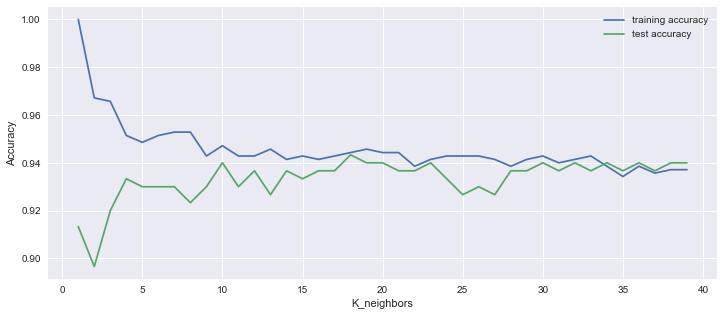

In [18]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 40
neighbors_settings = range(1, 40)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(12,5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K_neighbors")
plt.legend()
plt.savefig('knn_compare_model')
plt.show()

The plot shows the training and test set accuracy on the y-axis against the setting of K_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 17 neighbors.

## Test set results based on K values identified

In [22]:
# Lets compare K =1,16, 17,18,23 

from sklearn.metrics import classification_report,confusion_matrix
for k in [1,16,17,18,23]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    X_pred = knn.predict(X_test)
    print(f'For value of k is {k}')
    print(classification_report(y_test,X_pred))
    print('\n')

For value of k is 1
             precision    recall  f1-score   support

          0       0.92      0.91      0.91       149
          1       0.91      0.92      0.91       151

avg / total       0.91      0.91      0.91       300



For value of k is 16
             precision    recall  f1-score   support

          0       0.96      0.91      0.93       149
          1       0.92      0.96      0.94       151

avg / total       0.94      0.94      0.94       300



For value of k is 17
             precision    recall  f1-score   support

          0       0.96      0.91      0.93       149
          1       0.92      0.96      0.94       151

avg / total       0.94      0.94      0.94       300



For value of k is 18
             precision    recall  f1-score   support

          0       0.96      0.93      0.94       149
          1       0.93      0.96      0.94       151

avg / total       0.94      0.94      0.94       300



For value of k is 23
             precision    re

## Predicting and Evaluating Model

In [24]:
# Now with k =16
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
X_pred = knn.predict(X_test)

print(confusion_matrix(y_test,X_pred))
print(classification_report(y_test,X_pred))

[[136  13]
 [  6 145]]
             precision    recall  f1-score   support

          0       0.96      0.91      0.93       149
          1       0.92      0.96      0.94       151

avg / total       0.94      0.94      0.94       300



Our model has 94% accurate in predecting the Target outcome. This is pretty good given the size of the dataset we have.